<a href="https://colab.research.google.com/github/UpadhyeN/tensorflow/blob/main/TensorFlow_Udemy_Section5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
## get the data
# data is only for 2 classes

In [ ]:
import zipfile 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-02-09 12:52:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.122.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  82.7MB/s    in 1.3s    

2023-02-09 12:52:23 (82.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
# walk through the libraries
for dirpath,dirnames,filename in os.walk("pizza_steak"):
  print(len(dirpath),len(dirnames),len(filename))

11 4 0
17 2 0
23 0 750
23 0 750
16 2 0
22 0 250
22 0 250
30 0 0
24 0 1


In [ ]:
#another way to find
num_steak_images = len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images

750

In [ ]:
# images visulization
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of names
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # read in the image
  img = mpimg.imread(target_folder + '/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  return img


['1456841.jpg']


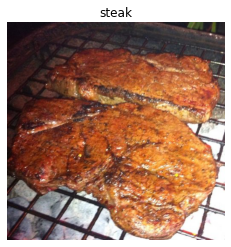

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",target_class='steak')

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)>

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
# get all pixel value between zero and one
# divide the image by 255.

img/255.

array([[[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set th seed
tf.random.set_seed(42)
# preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
# set up path to data
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,batch_size=32,target_size=(224,224),
                                            class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224)
                                                ,class_mode="binary",seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
# compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# fit the model
#history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len())

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
history_1 = model_1.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 0.5551 - accuracy: 0.7173 - val_loss: 0.3845 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4147 - accuracy: 0.8180 - val_loss: 0.3441 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3940 - accuracy: 0.8140 - val_loss: 0.3312 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3701 - accuracy: 0.8313 - val_loss: 0.3300 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3092 - accuracy: 0.8787 - val_loss: 0.3146 - val_accuracy: 0.8740


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
import os.path
if os.path.isfile("D:/masters/Emden/project/IIOT/tensorflow_models/model_1.hs") is False:
  model_1.save_weights('D:/masters/Emden/project/IIOT/tensorflow_models/model_1.hs')

In [ ]:
%cd /content/D:/masters/Emden/project/IIOT

/content/D:/masters/Emden/project/IIOT


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
import matplotlib.pyplot as plt

['1968947.jpg']
['101312.jpg']


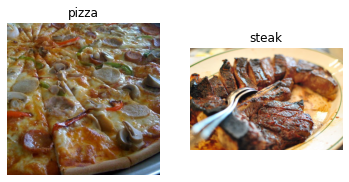

In [ ]:
plt.figure()
plt.subplot(1,2,1)
streak_img = view_random_image(target_dir = "pizza_steak/train/",target_class='pizza')
plt.subplot(1,2,2)
streak_img = view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [ ]:
# 116 : pre process the data.

In [ ]:
# define the directory dataset path 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# turn out data in batch : batch is small subset of the data.
# it can be looked at 32 images at a time.

In [ ]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load the image data from the directory
train_data = train_datagen.flow_from_directory(
                                                directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # get the next batch of the image
len(images),len(labels)

(32, 32)

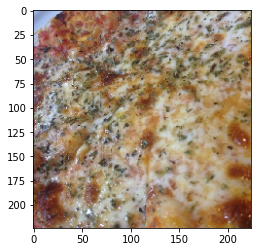

In [ ]:
plt.imshow(images[1])

In [ ]:
len(train_data) # total number of batch size

47

In [ ]:
# get first two images
images[:2],images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [ ]:
images[1].shape

(224, 224, 3)

In [ ]:
# view first batch of the label
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

## create a CNN
## baseline is a relatively simple model or exisitng result that you setup 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

|Crating a model  , CNN with 3 layers

In [ ]:
model_4 = Sequential(
    [Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation="sigmoid")
    ])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## check the length of training and tet data
len(train_data),len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 225ms/step - loss: 1.2128 - accuracy: 0.6680 - val_loss: 0.4301 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4063 - accuracy: 0.8240 - val_loss: 0.3762 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3169 - accuracy: 0.8787 - val_loss: 0.3716 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.1701 - accuracy: 0.9500 - val_loss: 0.3646 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.0616 - accuracy: 0.9840 - val_loss: 0.4132 - val_accuracy: 0.8340


In [ ]:
model_1.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x7f67d6989610>>

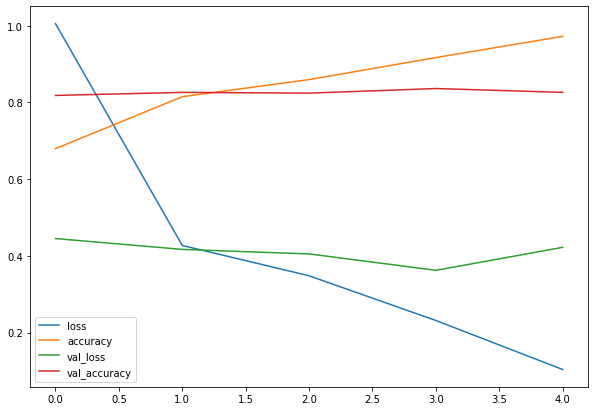

In [ ]:
# plotting training curves of the loss
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history["val_loss"]
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
# plot the loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.legend()
# plot the accuracy
# plt.figure() to create new figure
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.legend()




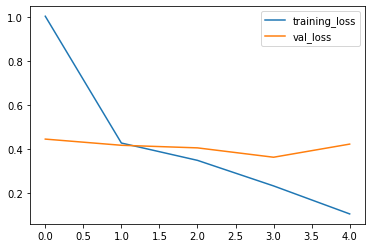

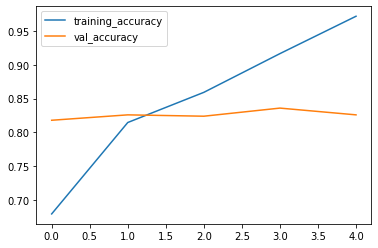

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# when validation loss strats to increase it is likely overfitting. it is learning pattern in test data to well


In [ ]:
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.2968 - accuracy: 0.8787 - val_loss: 0.3368 - val_accuracy: 0.8560
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.2348 - accuracy: 0.9153 - val_loss: 0.3912 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.1920 - accuracy: 0.9280 - val_loss: 0.4301 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.1610 - accuracy: 0.9400 - val_loss: 0.3493 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.0902 - accuracy: 0.9740 - val_loss: 0.4210 - val_accuracy: 0.8500


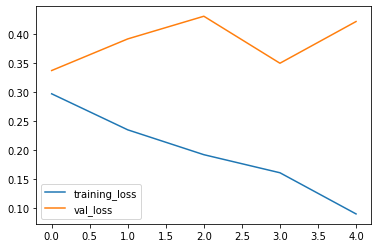

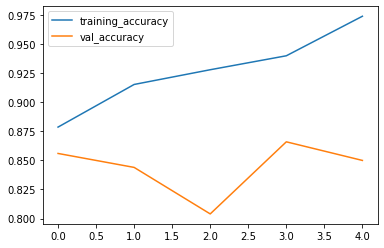

In [ ]:
plot_loss_curves(history_1)

# fiitng a machine learning model comes in 3 step
1. create baseline
2. beat the baseline by overfitting a larger model
3. reduce overfitting
# Ways to induce the overfitting:
1. increase the number of conv lyers
2. inceraese the number of conv filters
3. add another dense layers to the output of our flattened layers
# Reduce overfitting
1. add data augmentation
2. add regularization layers
3. add more data


In [ ]:
model_5 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
from tensorflow.python import test
history_5= model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6065 - accuracy: 0.6573 - val_loss: 0.4520 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4578 - accuracy: 0.7933 - val_loss: 0.4175 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4265 - accuracy: 0.8053 - val_loss: 0.3938 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3923 - accuracy: 0.8267 - val_loss: 0.3293 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3729 - accuracy: 0.8413 - val_loss: 0.3333 - val_accuracy: 0.8640


In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

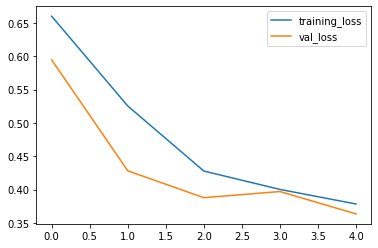

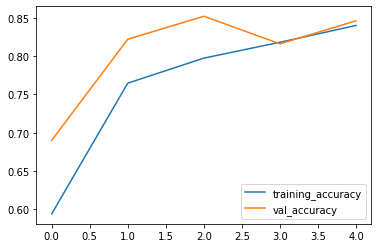

In [ ]:
plot_loss_curves(history_5)

Opening our bag of tricks and data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True
                                             )
# create image data generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
# data augmentation : changing the data so that the model has more generalised pattern
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# import data and augment it
print("Augmentated training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False)

# non augmented datagen
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)




Augmentated training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:

# non augementation test data
test_datagen = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Found 500 images belonging to 2 classes.


In [ ]:
 # create model on augmented data


In [ ]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
# compile th emodel
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented, # fitting model 6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 490ms/step - loss: 0.7083 - accuracy: 0.4313 - val_loss: 0.6858 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 23s 497ms/step - loss: 0.6942 - accuracy: 0.4927 - val_loss: 0.6789 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6831 - accuracy: 0.5780 - val_loss: 0.6539 - val_accuracy: 0.6160
Epoch 4/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6568 - accuracy: 0.6253 - val_loss: 0.5739 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6097 - accuracy: 0.6887 - val_loss: 0.5237 - val_accuracy: 0.7400


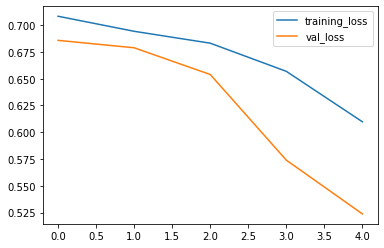

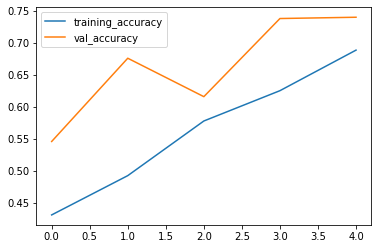

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# testing a single image
test_image_dir = '/content/pizza_steak/single_image/'
test_image_datagen = ImageDataGenerator(rescale=1/255.)
test_image = test_image_datagen.flow_from_directory(
                                                directory = test_image_dir,
                                               target_size = (224,224))

Found 0 images belonging to 0 classes.


In [ ]:
print("hello")

hello


In [ ]:
# with more epochs
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
# compile th emodel
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


history_6_more_epochs = model_6.fit(train_data_augmented, # fitting model 6 on augmented data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 527ms/step - loss: 0.7386 - accuracy: 0.4740 - val_loss: 0.6861 - val_accuracy: 0.6700
Epoch 2/10
47/47 [==============================] - 23s 492ms/step - loss: 0.6936 - accuracy: 0.5460 - val_loss: 0.6809 - val_accuracy: 0.6640
Epoch 3/10
47/47 [==============================] - 23s 489ms/step - loss: 0.6843 - accuracy: 0.6460 - val_loss: 0.6103 - val_accuracy: 0.6720
Epoch 4/10
47/47 [==============================] - 23s 490ms/step - loss: 0.6297 - accuracy: 0.6607 - val_loss: 0.6120 - val_accuracy: 0.6280
Epoch 5/10
47/47 [==============================] - 23s 487ms/step - loss: 0.5754 - accuracy: 0.7273 - val_loss: 0.7077 - val_accuracy: 0.6000
Epoch 6/10
47/47 [==============================] - 23s 492ms/step - loss: 0.6879 - accuracy: 0.5713 - val_loss: 0.5404 - val_accuracy: 0.7080
Epoch 7/10
47/47 [==============================] - 23s 489ms/step - loss: 0.6062 - accuracy: 0.6920 - val_loss: 0.4973 - val_accuracy: 0.8000

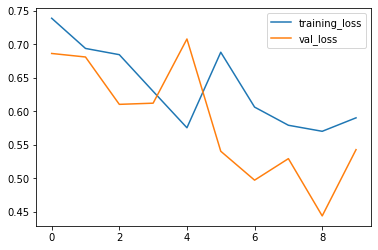

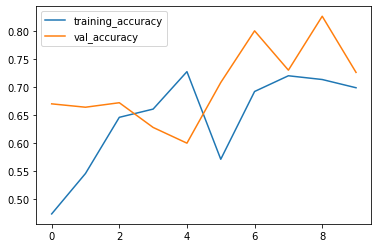

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_6_more_epochs)

In [ ]:
# actual predictions

In [ ]:
import matplotlib.image as mpimg

In [ ]:
test_image = mpimg.imread('/content/pizza_steak/single_image/pizza.jpg')

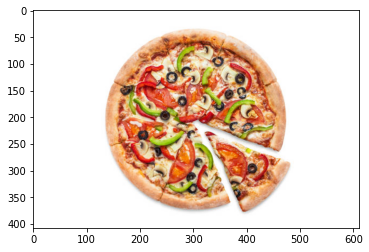

In [ ]:
plt.imshow(test_image)

In [ ]:
# can we pass directory
test_image.shape

(408, 612, 3)

In [ ]:
model_6.predict(test_image)

ValueError: ignored

In [ ]:
test_expanded_image = tf.expand_dims(test_image,axis=0)

In [ ]:
# create function to preprocess the image
def load_prep_function(filename,img_shape=224):
  '''
  reads an image from filename and truns into a tensor and reshape.
  '''
  # read in image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_jpeg(img)
  #resize
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # rescale the image
  img = img/255.
  return img

In [ ]:
# loading the image
test_image = load_prep_function('/content/pizza_steak/single_image/1001116.jpg')

In [ ]:
test_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3515406 , 0.34761903, 0.41820726],
        [0.3462185 , 0.34229693, 0.41288516],
        [0.34735894, 0.34343737, 0.4140256 ],
        ...,
        [0.6792716 , 0.77955186, 0.917647  ],
        [0.66134447, 0.76330525, 0.9084033 ],
        [0.6473389 , 0.75714284, 0.9022409 ]],

       [[0.34565824, 0.34173667, 0.4123249 ],
        [0.34901962, 0.34509805, 0.41568628],
        [0.35238093, 0.34845936, 0.4190476 ],
        ...,
        [0.7294116 , 0.82352924, 0.96314526],
        [0.70674247, 0.8019407 , 0.94313705],
        [0.67667025, 0.77863103, 0.9211278 ]],

       [[0.34985995, 0.34593838, 0.41484594],
        [0.35434175, 0.35042018, 0.41932774],
        [0.35218087, 0.35126048, 0.42184874],
        ...,
        [0.52697045, 0.61016375, 0.72585   ],
        [0.49477777, 0.58425355, 0.7002801 ],
        [0.45828268, 0.55152017, 0.6708678 ]],

       ...,

       [[0.38095245, 0.47899166, 0.7378152 ],
        [0.37

In [ ]:
pred = model_6.predict(tf.expand_dims(test_image,axis=0))

1/1 [==============================] - 0s 29ms/step


In [ ]:
# we can index the predicted probablity class
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  imports an image located at filename, makes a predictions with model.
  and plot the model
  """
  img = load_prep_function(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred))]

  # plot the image and 
  plt.imshow(img)
  plt.title(f'Predictions:{pred_class}')
  plt.axis(False);


1/1 [==============================] - 0s 71ms/step


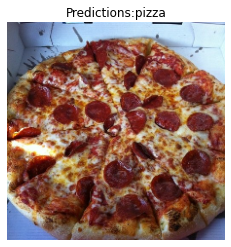

In [ ]:
pred_and_plot(model_6,'/content/pizza_steak/single_image/1001116.jpg')

1/1 [==============================] - 0s 68ms/step


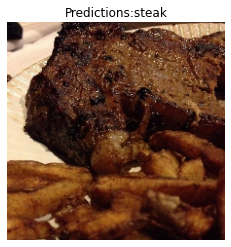

In [ ]:
pred_and_plot(model_6,'/content/pizza_steak/single_image/1012080.jpg')